# Kodluyoruz - Carbon Data Science Bootcamp 
## Week01 Task

**By : Berk Pişkin**

Our aim is to create a python class for handling data reading and conversion. Type of the input data is one of the following: a numpy array, pandas dataframe, a file path, or not given at all. At the end of the process, we should end up with a pandas dataframe that has the information of original data and some methods to apply on our output.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
class DataOperations:
    """
    DataOperations is a class for converting different types of objects into a Pandas DataFrame.
    
    Parameters
    ----------
    obj : an object of type numpy array, pandas dataframe, a file path, or None. default None
    
    Methods
    -------
    operate : Checks the type of the object and then constructs a dataframe from it.
    """
    
    def __init__(self,obj = None):
        """ Initialize self."""
        
        self.obj = obj
        
    def operate(self):
        """
        When operate() method is applied, constructed dataframe is stored in 'df' attribute of that instance of the class.
        
        """
        
        if isinstance(self.obj,np.ndarray):
            self.df = pd.DataFrame(self.obj)
            return self.df
        
        elif isinstance(self.obj,str):
            path = self.obj.split(sep = ".")
            filetype = path[-1]
            if filetype == "csv":
                self.df = pd.read_csv(self.obj)
                return self.df
            elif filetype == "json":
                self.df = pd.read_json(self.obj)
                return self.df
            else:
                print("Unknown data type")
        
        elif isinstance(self.obj,pd.DataFrame):
            self.df = self.obj
            return self.df
        
        elif type(self.obj) == type(None):
            random_data = {"v1" : np.random.randn(100),
                                           "v2" : np.random.randn(100),
                                           "v3" : np.random.randn(100),
                                           "v4" : np.random.randn(100),
                                           "v5" : np.random.randn(100)}
            
            self.df = pd.DataFrame(data = random_data , columns = random_data.keys())
            return self.df
    def statistics(self):
        """ Takes in a dataframe and prints basic statistics of it."""
        data = self.operate()
        for column in data.columns:
            print(f"Column '{column}' is of type {data[column].dtype} and has {data[column].count()} non-null values.")
        print("Statistics of numerical columns :\n")
        print(data.describe().T)
        
    def visualize(self):
        """Prints histogram and boxplot for two random numerical columns of the given dataframe."""
        data = self.operate()
        data_numeric = data.select_dtypes(include = "number")
        col1 , col2 = np.random.choice(data_numeric.columns) , np.random.choice(data_numeric.columns)
        fig, axs = plt.subplots(2,1,figsize = (16,10))
        axs[0].title.set_text(f"Histogram for {col1}")
        axs[1].title.set_text(f"Boxplot for {col2}")
        sns.histplot(data = data,x = col1,ax = axs[0],color="steelblue");
        sns.boxplot(data = data,x = col2,ax = axs[1],color="gold");
    
    

# Demonstration

Now we are going to create four instances from DataOperations class with different types of parameters. Then for each instance, we are going to demonstrate the class methods.

**1) parameter type = numpy.array**

In [83]:
data1 = DataOperations(np.array([1,5,2,6,3,6,1,1,5,7,9,34,55,3]))

In [84]:
data1.operate()

,0
0,1
1,5
2,2
3,6
4,3
5,6
6,1
7,1
8,5
9,7


In [85]:
data1.df

,0
0,1
1,5
2,2
3,6
4,3
5,6
6,1
7,1
8,5
9,7


In [86]:
data1.statistics()

Column '0' is of type int32 and has 14 non-null values.
Statistics of numerical columns :

   count      mean        std  min   25%  50%   75%   max
0   14.0  9.857143  15.436506  1.0  2.25  5.0  6.75  55.0


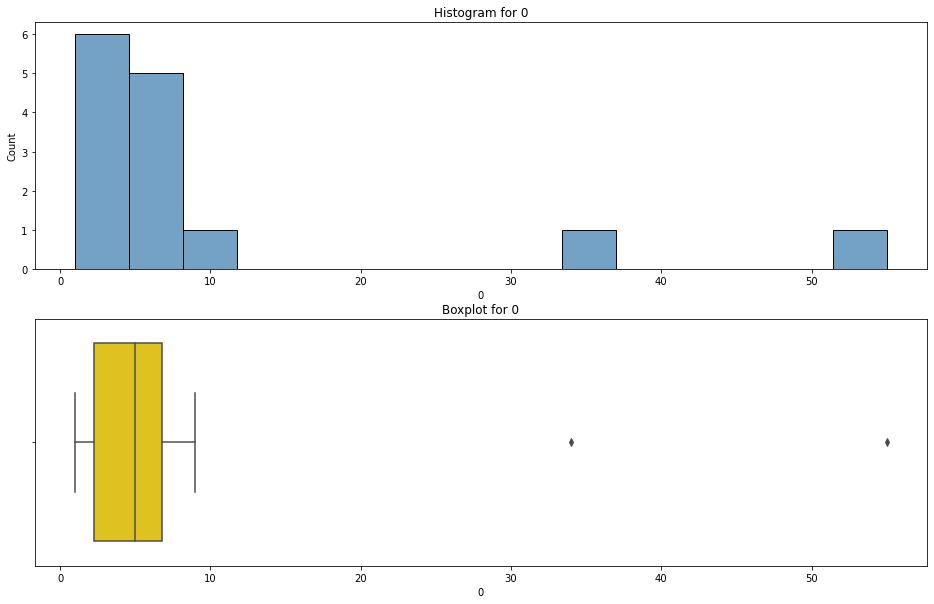

In [87]:
data1.visualize()

**2) parameter type = str (path)**

In [71]:
data2_1 = DataOperations("C:/Users/Berk/Desktop/trial_dataset.csv")

In [72]:
data2_1.operate()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [73]:
data2_1.df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
data2_1.statistics()

Column 'sepal_length' is of type float64 and has 150 non-null values.
Column 'sepal_width' is of type float64 and has 150 non-null values.
Column 'petal_length' is of type float64 and has 150 non-null values.
Column 'petal_width' is of type float64 and has 150 non-null values.
Column 'species' is of type object and has 150 non-null values.
Statistics of numerical columns :

              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


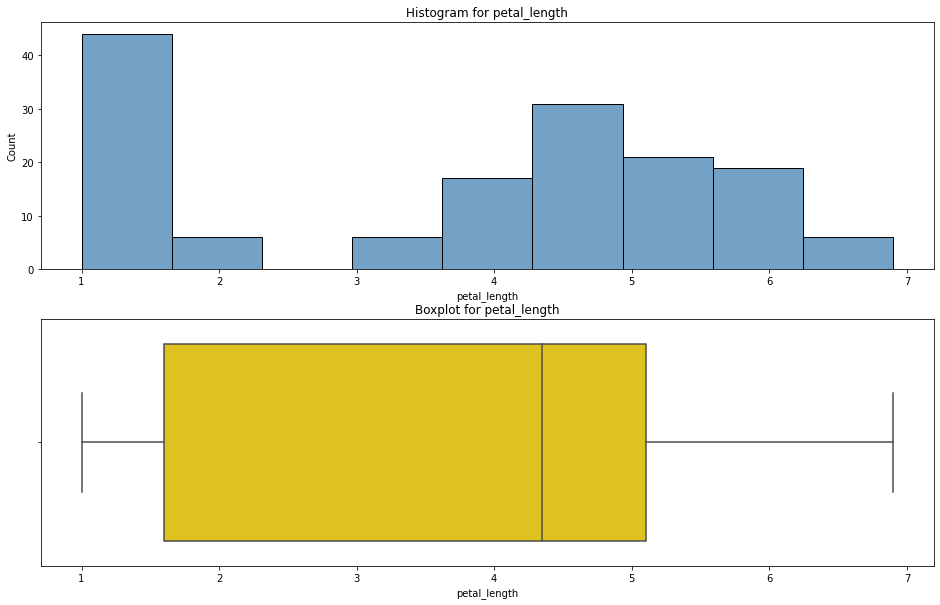

In [75]:
data2_1.visualize()

In [76]:
data2_2 = DataOperations("C:/Users/Berk/Desktop/trial_dataset.json")

In [77]:
data2_2.operate()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [79]:
data2_2.df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [80]:
data2_2.statistics()

Column 'sepal_length' is of type float64 and has 150 non-null values.
Column 'sepal_width' is of type float64 and has 150 non-null values.
Column 'petal_length' is of type float64 and has 150 non-null values.
Column 'petal_width' is of type float64 and has 150 non-null values.
Column 'species' is of type object and has 150 non-null values.
Statistics of numerical columns :

              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


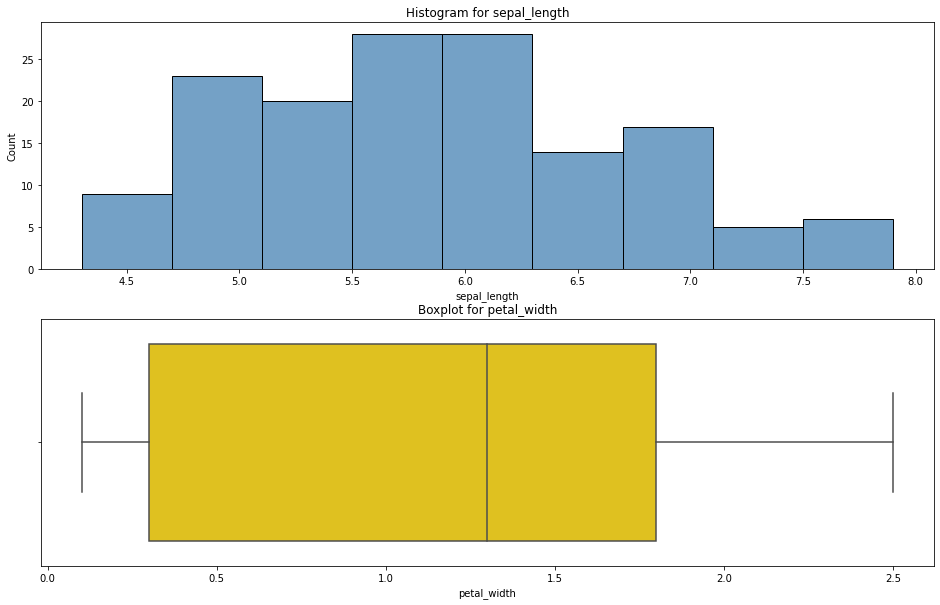

In [81]:
data2_2.visualize()

**3) parameter type = pandas.DataFrame**

In [62]:
tips = sns.load_dataset("tips")
df = tips.copy()
data3 = DataOperations(df)

In [63]:
data3.operate()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [64]:
data3.df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
data3.statistics()

Column 'total_bill' is of type float64 and has 244 non-null values.
Column 'tip' is of type float64 and has 244 non-null values.
Column 'sex' is of type category and has 244 non-null values.
Column 'smoker' is of type category and has 244 non-null values.
Column 'day' is of type category and has 244 non-null values.
Column 'time' is of type category and has 244 non-null values.
Column 'size' is of type int64 and has 244 non-null values.
Statistics of numerical columns :

            count       mean       std   min      25%     50%      75%    max
total_bill  244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275  50.81
tip         244.0   2.998279  1.383638  1.00   2.0000   2.900   3.5625  10.00
size        244.0   2.569672  0.951100  1.00   2.0000   2.000   3.0000   6.00


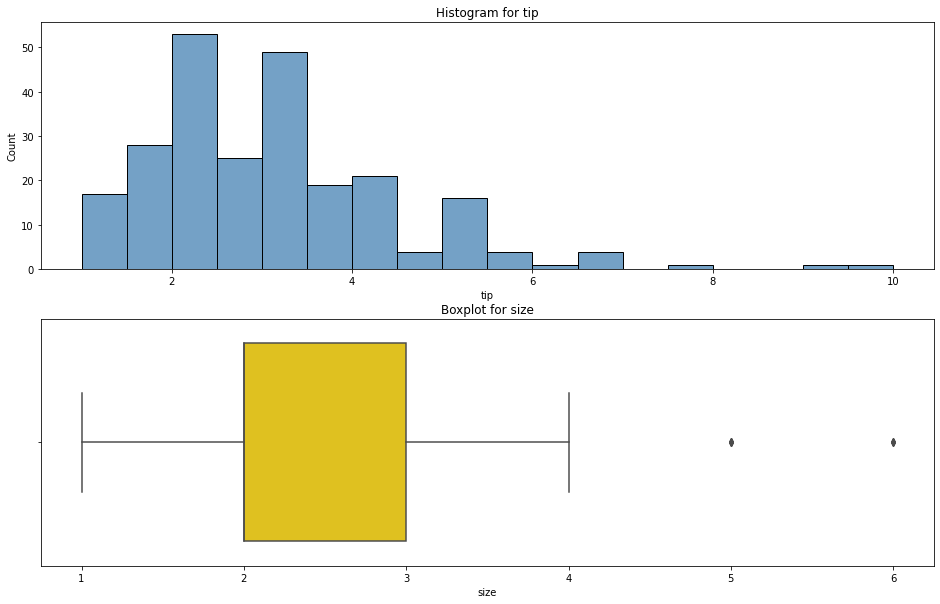

In [66]:
data3.visualize()

**4) parameter type = None (not given)**

In [67]:
data4 = DataOperations()

In [68]:
data4.operate()

,v1,v2,v3,v4,v5
0,0.239079,0.938189,-0.891722,0.143633,0.548669
1,1.826420,-2.806636,-0.432844,0.312021,-1.351458
2,0.573205,-1.316191,2.542120,1.287346,0.759103
3,0.219319,-0.540885,-0.072854,-0.971091,-0.138760
4,2.442206,-0.746886,-1.374709,0.487111,1.667383
...,...,...,...,...,...
95,-0.750015,0.186968,0.268743,-0.058309,-0.846399
96,1.873790,0.160221,-0.359470,-0.272458,1.314441
97,-0.058974,-0.536178,1.135453,-0.355057,-0.834060
98,-0.840610,1.121091,-1.895256,1.216280,0.210190


In [69]:
data4.statistics()

Column 'v1' is of type float64 and has 100 non-null values.
Column 'v2' is of type float64 and has 100 non-null values.
Column 'v3' is of type float64 and has 100 non-null values.
Column 'v4' is of type float64 and has 100 non-null values.
Column 'v5' is of type float64 and has 100 non-null values.
Statistics of numerical columns :

    count      mean       std       min       25%       50%       75%  \
v1  100.0  0.051110  0.961562 -2.118533 -0.600210 -0.023049  0.773855   
v2  100.0 -0.022703  1.023003 -2.387232 -0.721557 -0.119863  0.592529   
v3  100.0 -0.061154  0.886188 -2.467688 -0.707814  0.118725  0.579855   
v4  100.0 -0.037642  1.014301 -2.164565 -0.749075 -0.067591  0.766403   
v5  100.0  0.280833  0.979814 -2.174756 -0.348323  0.220882  0.947540   

         max  
v1  2.144514  
v2  3.504741  
v3  1.878567  
v4  2.040271  
v5  3.078292  


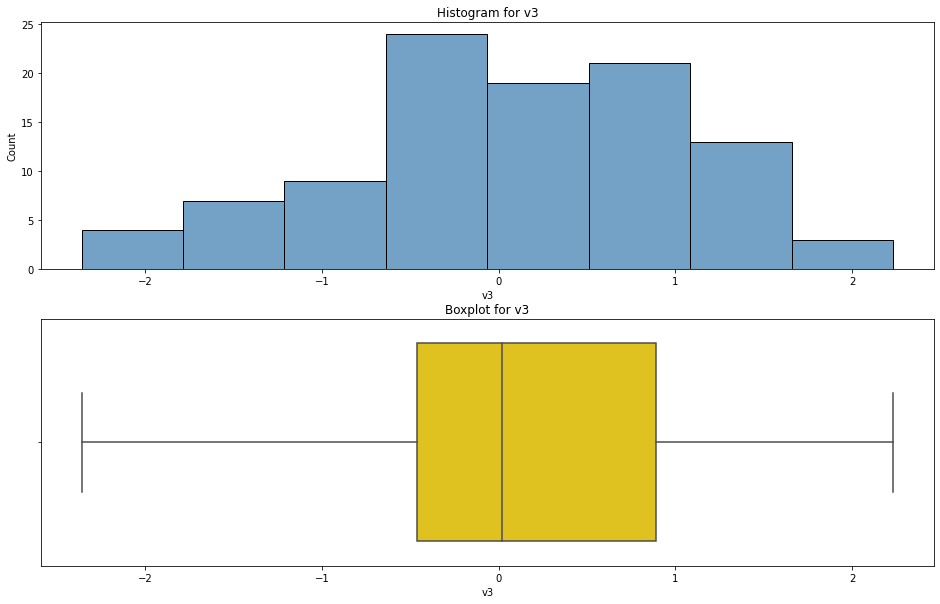

In [70]:
data4.visualize()